Upload train.csv


Saving train.csv to train (1).csv


/tmp/ipython-input-1473115019.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Age"].fillna(data["Age"].median(), inplace=True)
/tmp/ipython-input-1473115019.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'


Logistic Regression Accuracy : 0.804
Random Forest Accuracy     : 0.810

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


Random Forest Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.71      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



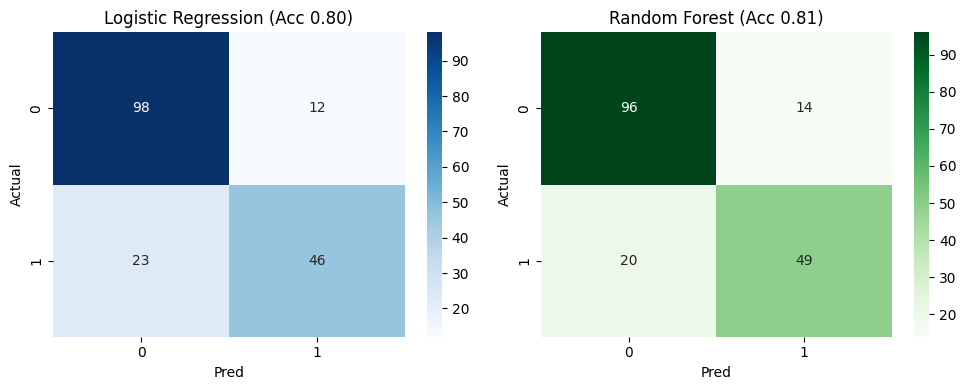

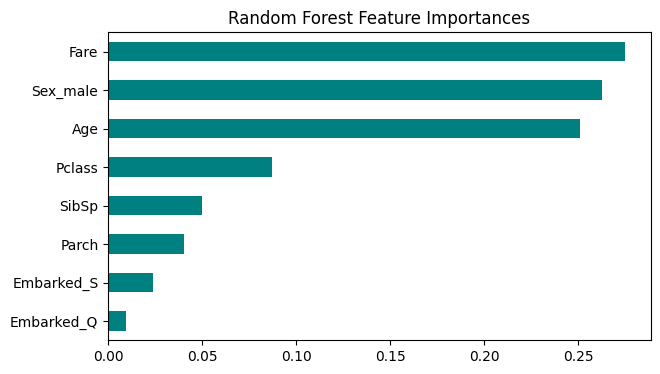


=== Accuracy Comparison ===
                 Model  Accuracy
0  Logistic Regression  0.804469
1        Random Forest  0.810056


In [2]:
# === Assignment 6: Logistic Regression & Random Forest (Titanic / Churn demo) ===
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from google.colab import files
import seaborn as sns

# ---- Upload dataset ----
print("Upload train.csv")
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))

# ---- Basic preprocessing ----
target = "Survived"         # change to 'Churn' if using your churn dataset
features = ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]
data = df[features+[target]].copy()
data["Age"].fillna(data["Age"].median(), inplace=True)
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)
data = pd.get_dummies(data, columns=["Sex","Embarked"], drop_first=True)

X, y = data.drop(columns=[target]), data[target]
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ---- Models ----
num_cols = ["Pclass","Age","SibSp","Parch","Fare"]
sc = StandardScaler(); Xtr_s, Xte_s = Xtr.copy(), Xte.copy()
Xtr_s[num_cols]=sc.fit_transform(Xtr[num_cols]); Xte_s[num_cols]=sc.transform(Xte[num_cols])

log = LogisticRegression(max_iter=1000).fit(Xtr_s, ytr)
rf  = RandomForestClassifier(n_estimators=200, random_state=42).fit(Xtr, ytr)

# ---- Predictions & accuracy ----
pred_log, pred_rf = log.predict(Xte_s), rf.predict(Xte)
acc_log, acc_rf = accuracy_score(yte, pred_log), accuracy_score(yte, pred_rf)
print(f"\nLogistic Regression Accuracy : {acc_log:.3f}")
print(f"Random Forest Accuracy     : {acc_rf:.3f}")

# ---- Reports ----
print("\nLogistic Regression Report:\n", classification_report(yte, pred_log))
print("\nRandom Forest Report:\n", classification_report(yte, pred_rf))

# ---- Confusion matrices (inline visuals) ----
fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.heatmap(confusion_matrix(yte, pred_log), annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title(f"Logistic Regression (Acc {acc_log:.2f})"); ax[0].set_xlabel("Pred"); ax[0].set_ylabel("Actual")
sns.heatmap(confusion_matrix(yte, pred_rf), annot=True, fmt="d", cmap="Greens", ax=ax[1])
ax[1].set_title(f"Random Forest (Acc {acc_rf:.2f})"); ax[1].set_xlabel("Pred"); ax[1].set_ylabel("Actual")
plt.tight_layout(); plt.show()

# ---- Feature importance ----
imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)
plt.figure(figsize=(7,4)); imp.plot(kind="barh", color="teal")
plt.title("Random Forest Feature Importances"); plt.show()

# ---- Accuracy comparison summary ----
print("\n=== Accuracy Comparison ===")
print(pd.DataFrame({"Model":["Logistic Regression","Random Forest"],
                    "Accuracy":[acc_log, acc_rf]}))
